In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from imblearn.under_sampling import EditedNearestNeighbours, OneSidedSelection, CondensedNearestNeighbour, NeighbourhoodCleaningRule, RandomUnderSampler, TomekLinks
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
def evaluate_sampling(x_train, y_train, x_test, y_test):
    
    enn = EditedNearestNeighbours()
    oss = OneSidedSelection(random_state=0)
    cnn = CondensedNearestNeighbour(random_state=0)
    ncr = NeighbourhoodCleaningRule()
    rus = RandomUnderSampler(random_state=0)
    tl = TomekLinks()
    adasyn = ADASYN(random_state=0)
    blsmote = BorderlineSMOTE(random_state=0)
    ros = RandomOverSampler(random_state=0)
    smote = SMOTE(random_state=0)
    smoteenn = SMOTEENN(random_state=0)
    smotetomek = SMOTETomek(random_state=0)
    
    x_enn, y_enn = enn.fit_resample(x_train, y_train)
    x_oss, y_oss = oss.fit_resample(x_train, y_train)
    x_cnn, y_cnn = cnn.fit_resample(x_train, y_train)
    x_ncr, y_ncr = ncr.fit_resample(x_train, y_train)
    x_rus, y_rus = rus.fit_resample(x_train, y_train)
    x_tl, y_tl = tl.fit_resample(x_train, y_train)
    x_adasyn, y_adasyn = adasyn.fit_resample(x_train, y_train)
    x_blsmote, y_blsmote = blsmote.fit_resample(x_train, y_train)
    x_ros, y_ros = ros.fit_resample(x_train, y_train)
    x_smote, y_smote = smote.fit_resample(x_train, y_train)
    x_smoteenn, y_smoteenn = smoteenn.fit_resample(x_train, y_train)
    x_smotetomek, y_smotetomek = smotetomek.fit_resample(x_train, y_train)
    
    lr_enn = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_oss = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_cnn = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_ncr = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_rus = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_tl = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_adasyn = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_blsmote = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_ros = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_smote = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_smoteenn = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    lr_smotetomek = LogisticRegression(C=1.5, max_iter=1000, random_state=0)
    
    lr_enn.fit(x_enn, y_enn)
    lr_oss.fit(x_oss, y_oss)
    lr_cnn.fit(x_cnn, y_cnn)
    lr_ncr.fit(x_ncr, y_ncr)
    lr_rus.fit(x_rus, y_rus)
    lr_tl.fit(x_tl, y_tl)
    lr_adasyn.fit(x_adasyn, y_adasyn)
    lr_blsmote.fit(x_blsmote, y_blsmote)
    lr_ros.fit(x_ros, y_ros)
    lr_smote.fit(x_smote, y_smote)
    lr_smoteenn.fit(x_smoteenn, y_smoteenn)
    lr_smotetomek.fit(x_smotetomek, y_smotetomek)
    
    enn_prediction = (lr_enn.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    oss_prediction = (lr_oss.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    cnn_prediction = (lr_cnn.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    ncr_prediction = (lr_ncr.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    rus_prediction = (lr_rus.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    tl_prediction = (lr_tl.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    adasyn_prediction = (lr_adasyn.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    blsmote_prediction = (lr_blsmote.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    ros_prediction = (lr_ros.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    smote_prediction = (lr_smote.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    smoteenn_prediction = (lr_smoteenn.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    smotetomek_prediction = (lr_smotetomek.predict_proba(x_test)[:, 1] > 0.5).astype('int32')
    
    roc_enn = roc_auc_score(y_test, enn_prediction)
    roc_oss = roc_auc_score(y_test, oss_prediction)
    roc_cnn = roc_auc_score(y_test, cnn_prediction)
    roc_ncr = roc_auc_score(y_test, ncr_prediction)
    roc_rus = roc_auc_score(y_test, rus_prediction)
    roc_tl = roc_auc_score(y_test, tl_prediction)
    roc_adasyn = roc_auc_score(y_test, adasyn_prediction)
    roc_blsmote = roc_auc_score(y_test, blsmote_prediction)
    roc_ros = roc_auc_score(y_test, ros_prediction)
    roc_smote = roc_auc_score(y_test, smote_prediction)
    roc_smoteenn = roc_auc_score(y_test, smoteenn_prediction)
    roc_smotetomek = roc_auc_score(y_test, smotetomek_prediction)
    
    
    rocs = [roc_enn, roc_oss, roc_cnn, roc_ncr, roc_rus, roc_tl, roc_adasyn, roc_blsmote, roc_ros, roc_smote, roc_smoteenn, roc_smotetomek]
    
    sampling_name = ['ENN', 'OSS', 'CNN', 'NCR', 'RUS', 'TL', 'ADASYN', 'BLSMOTE', 'ROS', 'SMOTE', 'SMOTE+ENN', 'SMOTE+TOMEK']
    xticks = [i for i in range(12)]
    
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_xticks(xticks)
    ax.set_xticklabels(sampling_name, ha='right')
    ax.tick_params(axis='x', labelsize=15, rotation=30)
    ax.set_xlabel('Method of sampling', fontsize=15)
    ax.set_ylabel('AUROC', fontsize=15)
    ax.set_title('Model performance based on sampling', fontsize=20)
    
    ax.bar(xticks, rocs)
    
    plt.show()
    
    return rocs

In [3]:
df = pd.read_csv('C:/Users/lab-gpu/Documents/innerwave-project/저출산/data/AI_predict_3537_1_extValidation0208_일괄예측.csv', encoding='euc-kr')

df = df.drop(['No', 'ID__AI_predict_3537_1.csv', '__예측값_DELIVERY_MT__AI_predict_3537_1.csv', 'Mode_del_predict_cs', 'Probability_CS', 'Probability_CS', 'Cause_delivery', 'Mode_del_predict_nsd', 'Mode_del_act_nsd'], axis=1)
df = pd.concat([df, pd.get_dummies(df['BABY_SEX__AI_predict_3537_1.csv'])], axis=1)
df = df.drop('BABY_SEX__AI_predict_3537_1.csv', axis=1)
df

,AGE__AI_predict_3537_1.csv,MM_HT__AI_predict_3537_1.csv,MM_PRE_WT__AI_predict_3537_1.csv,MM_WT__AI_predict_3537_1.csv,MM_PRE_BMI__AI_predict_3537_1.csv,MM_BMI__AI_predict_3537_1.csv,PR_36_GA__AI_predict_3537_1.csv,PR_WK36_BPD_1_1__AI_predict_3537_1.csv,PR_WK36_HC_1_1__AI_predict_3537_1.csv,PR_WK36_AC_1_1__AI_predict_3537_1.csv,PR_WK36_EFW_1_1_1_1__AI_predict_3537_1.csv,PREG_Gad__AI_predict_3537_1.csv,Probability_NSD,Mode_del_act_cs,F,M
0,29,165.0,62.0,81.0,22.77,29.75,251,93.0,327.0,329.0,2888,280,0.45900,1,1,0
1,31,160.0,46.0,56.0,17.97,21.88,253,89.0,330.0,335.0,2997,282,0.66748,1,1,0
2,28,162.0,50.0,62.0,19.05,23.62,260,92.0,331.7,328.0,2910,287,0.82401,1,1,0
3,32,156.0,43.0,55.0,17.67,22.60,260,91.1,326.9,322.2,2827,282,0.65571,1,0,1
4,33,165.0,60.0,73.0,22.04,26.81,258,93.4,326.2,348.8,3383,270,0.51487,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,34,161.0,65.0,57.0,21.99,25.08,258,93.0,330.0,311.0,2873,268,0.82562,0,1,0
298,38,156.8,49.0,61.0,19.93,24.81,265,92.8,331.9,301.5,2478,269,0.13511,1,0,1
299,33,164.5,57.0,71.0,21.06,26.24,259,88.9,320.3,319.5,2819,274,0.74338,0,1,0
300,34,161.0,68.0,78.0,26.23,30.09,258,80.9,325.6,323.8,2859,278,0.38942,0,0,1


In [4]:
X = df.drop('Mode_del_act_cs', axis=1)
Y = df['Mode_del_act_cs']
X = (X - X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, stratify=Y, random_state=0)

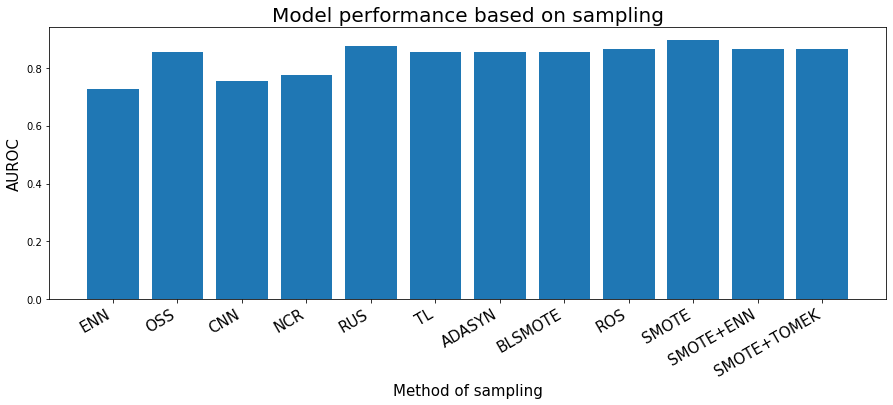

In [6]:
rocs = evaluate_sampling(x_train, y_train, x_test, y_test)

In [7]:
rocs

[0.726829268292683,
 0.8546341463414633,
 0.7546341463414635,
 0.7746341463414634,
 0.8746341463414633,
 0.8546341463414633,
 0.8546341463414633,
 0.8546341463414633,
 0.8646341463414633,
 0.8946341463414633,
 0.8646341463414633,
 0.8646341463414633]